# Introducción

**Curso: Análisis Predictivo de Series Temporales**

**Posgrado de Big Data e Inteligencia Artificial**

**Universidad ORT Uruguay**

**Docente: [Andrés Ferragut](https://aferragu.github.io)**

## Materiales

<br />

 * **Libros del curso**: 
 
     * **Referencia:** [Robert H. Shumway, David S. Stoffer, "Time Series: A Data Analysis Approach Using R"](https://www.stat.pitt.edu/stoffer/tsda/).
     * **Complementario:** [Robert H. Shumway, David S. Stoffer, "Time Series Analysis and Its Applications (With R Examples)](http://www.stat.ucla.edu/~frederic/415/S23/tsa4.pdf)".
 
 <br />
 
 * **Materiales de referencia**: 

     * [Sitio de Github](https://github.com/aferragu/curso_series_temporales) del curso. Siempre actualizado a los últimos materiales.
     * Equipo de Teams. Para discusiones, consultas, etc.
     * [Sitio de Aulas](https://aulas.ort.edu.uy/course/view.php?id=4303) de la asignatura.

## Software

 * **Para el desarrollo del curso**: Jupyter notebooks + Python (antes R).
 
     + Se pueden correr en: https://notebook-fi.facultades.ort.edu.uy/
     + Instalar local a través de [Anaconda](https://www.anaconda.com/products/individual). Se provee un `requirements.txt` para hacerlo.
     + Correr usando la Imagen Docker oficial de [jupyter](https://quay.io/repository/jupyter/scipy-notebook)
     + Otros sitios en línea (Google Colab, CoCalc, etc. etc.)

<br />

 * **Material de ejemplo** (acompañante del libro): https://www.stat.pitt.edu/stoffer/tsa4/

## Evaluación

 * **Ejercicios en clase** (30 pts): Corresponden a una selección de los ejercicios al final de cada uno de los cuadernos de clase.
 
 <br />
 
 * **Obligatorio** (40 pts): Problema a definir con los estudiantes. En grupo. Análisis de una serie de datos usando herramientas del curso o estudio de algún modelo/algoritmo que no se haya visto en clase.
 
 <br />
 
 * **Parcial** (30 pts): Evaluación individual al final del curso.
 
 <br />
 

**Aprobación**: Suma $\geq$ 70.

## Temario

 * Introducción
 * Regresión y análisis exploratorio de series.
 * Análisis espectral.
 * Modelos autorregresivos y de media móvil (ARMA)
 * Modelos ARIMA (ARMA integrado) para series no estacionarias.
 * Modelos en espacio de estados.
 * Machine learning aplicado a series.


## Bibliotecas

  * `astsa`:  Es la biblioteca de R que acompaña al libro, y tiene ejemplos de series de datos y herramientas para graficarlas, así como algunas de las herramientas de modelado.

  * `astsadata`: Biblioteca de Python que incluye los datos de `astsa` para trabajar en Python.
       - Instalación: `pip install astsadata` 

  * `statsmodels`: Biblioteca de análisis estadístico en Python.

  * `matplotlib`, `pandas`, `numpy`, `scipy`: bibliotecas estándar de manejo de datos y gráficas en Python.


In [1]:
## Ejemplo: instalación de astsadata usando pip:
#!pip install astsadata
#Importo astsadata
import warnings
with warnings.catch_warnings(action="ignore"):
    import astsadata as astsa
    
## Para las figuras
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['axes.grid'] = True

# Ejemplos de series temporales

A continuación presentamos varios ejemplos de series temporales a partir de datos reales para ilustrar las preguntas que buscamos contestar con las herramientas del curso.

## Ejemplo 1: Ganancias trimestrales por acción de Johnson & Johnson.

* 21 años de datos (84 trimestres) desde 1960 a 1980.

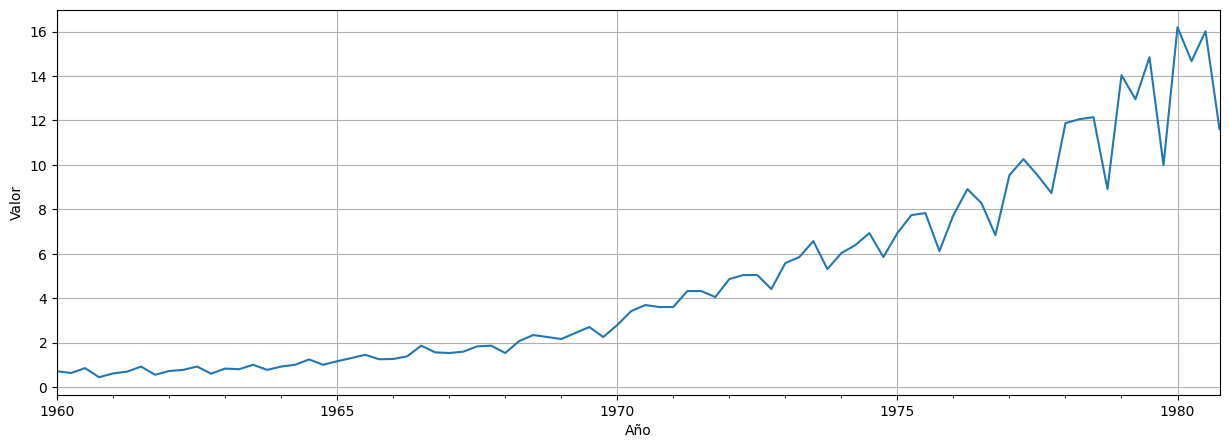

In [2]:
jj = astsa.jj
jj.plot(xlabel="Año", ylabel="Valor", legend=False);

### Observaciones

* Hay una tendencia creciente a lo largo de la serie...¿cómo la detectamos?
* Hay un comportamiento regular alrededor de dicha tendencia: cada 4 trimestres hay uno más bajo. ¿Cómo lo estimamos?
* ¿Podemos *predecir* el cuánto serán las ganancias en el futuro?

## Ejemplo 2: Calentamiento global

Serie de datos de temperaturas medias anuales de 1880 a 2009, en relación al promedio 1951-1980, en grados centigrados.

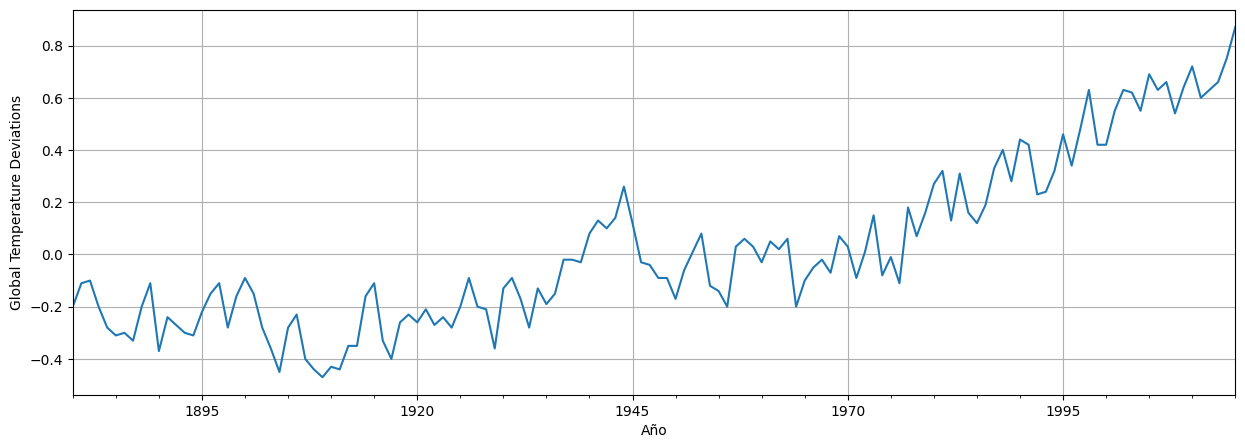

In [3]:
globtemp = astsa.globtemp
globtemp.plot(xlabel="Año", ylabel="Global Temperature Deviations", legend=False, grid=True);

### Observaciones

* Parece haber una tendencia creciente, comenzando alrededor de 1970.
* ¿Esto confirma el calentamiento global? 
* ¿Qué pasa si miramos escalas más largas de tiempo? 
* ¿Es estadísticamente significativo el cambio?

## Ejemplo 3: Precio de exportación del salmon

Serie de datos mensual con el precio de exportación del Salmón Noruego, en dólares por kilogramo, de Setiembre 2003 a Junio 2017

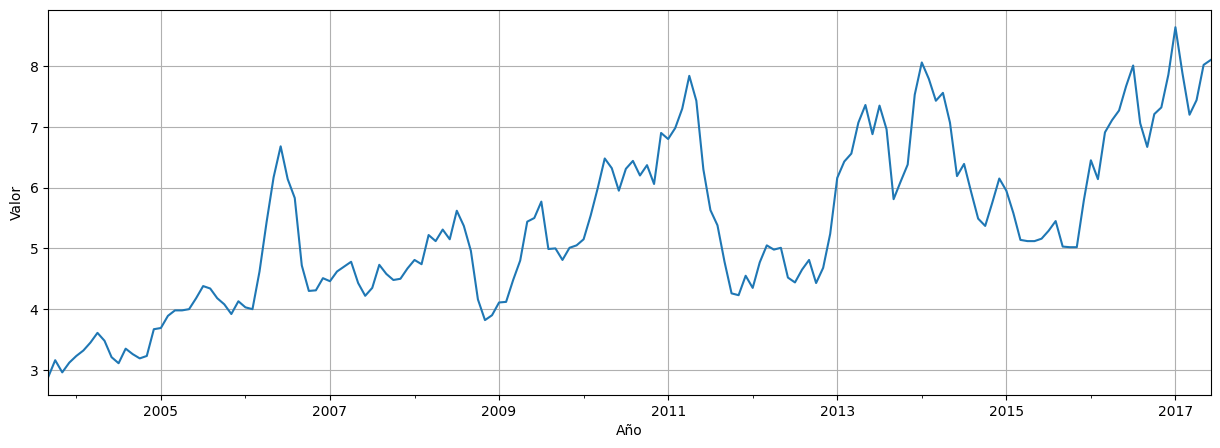

In [4]:
salmon = astsa.salmon
salmon.plot(xlabel="Año", ylabel="Valor", legend=False, grid=True);

### Observaciones:

* Combina tendencia con ciclos de escala más lenta.

* ¿Cómo identificamos estos ciclos?

* ¿Cómo analizamos la dependencia de corto plazo?

## Ejemplo 4: Señal acústica

Señal de 1000 muestras ($0.1s$) de audio de la palabra "aaahhh". 

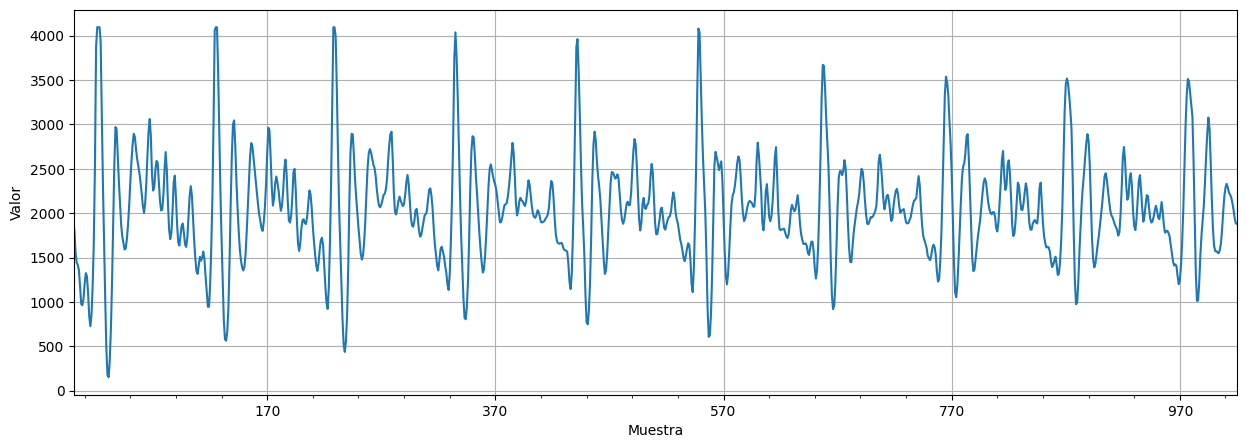

In [5]:
speech = astsa.speech
speech.plot(xlabel="Muestra", ylabel="Valor", legend=False, grid=True);

In [6]:
##Para reproducir el sonido:
from IPython.display import Audio

Audio(speech.value, rate=10000)

### Observaciones

* Señal con periodicidades importantes, debido al funcionamiento físico del sistema (sonido)
* Estacionaria en el tiempo (mantiene las características)
* El problema de interés puede ser *reconocer* las frecuencias involucradas.
* También el fonema o estructura de lo que se habla.

## Ejemplo 5: Dow Jones

Serie de retornos diarios (o cambio porcentual) del índice Dow Jones de 2006 a 2016.

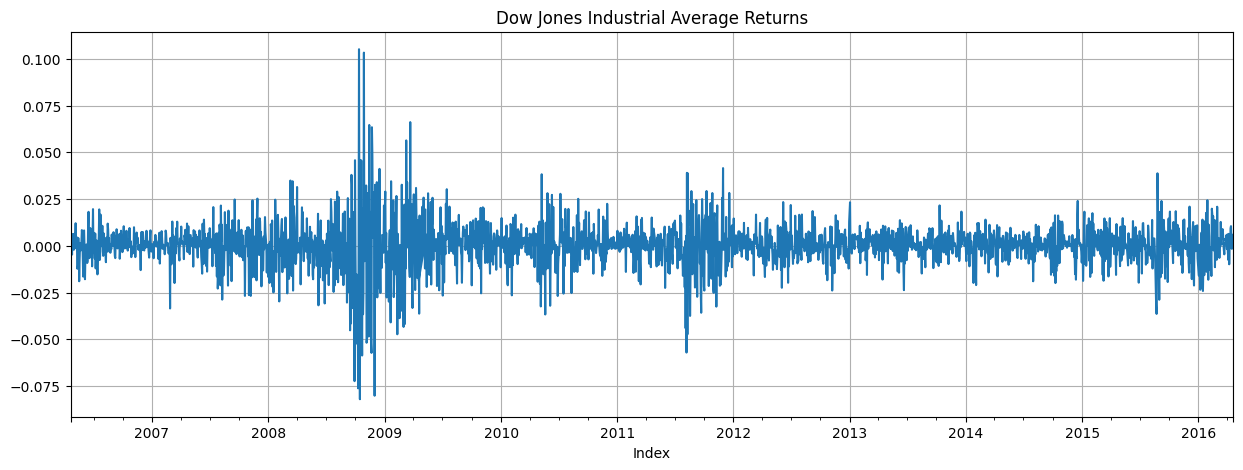

In [7]:
import numpy as np
djiar = np.log(astsa.djia["Close"]).diff()
djiar.plot(title="Dow Jones Industrial Average Returns");

### Observaciones:

* Media de retornos estable, alrededor de 0 (es decir poca variación diaria).
* Pero aparecen períodos de alta *volatilidad* (varianza).
* Es de interés predecir este tipo de fenómenos.
* A modo de ejemplo el pico alto corresponde a la crisis financiera de 2008.

## Ejemplo 6:  El niño y los peces

Este es un ejemplo de *correlación* entre fenómenos. Se tiene la serie de 1950-1987 del Southern Oscillation Index (vinculado a la temperatura del Océano Pacífico) así como a la población de peces (Recruitment)

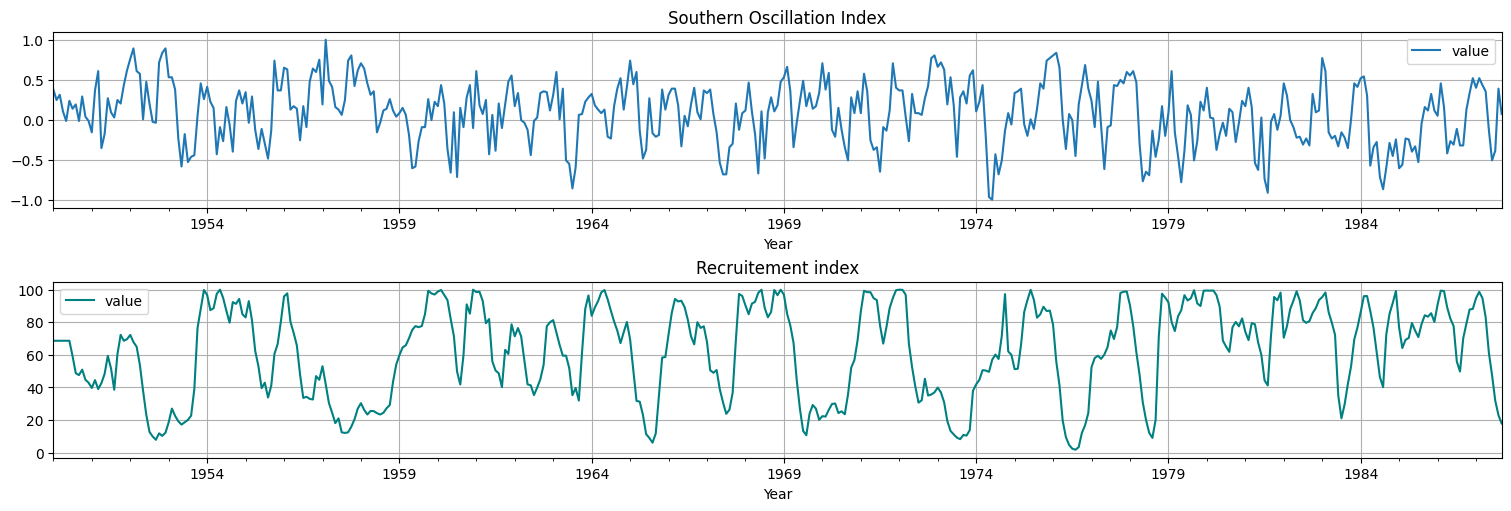

In [8]:
soi = astsa.soi
rec = astsa.rec

fig, axs = plt.subplots(2, 1, constrained_layout = True)
soi.plot(ax=axs[0], xlabel="Year", title="Southern Oscillation Index")
rec.plot(ax=axs[1], xlabel="Year", title="Recruitement index", color="teal");

### Observaciones

* Comportamiento periódico, con ciclos regulares.

* Varios períodos o frecuencias aparecen (por ej. en la 2a. parece haber dos frecuencias de oscilación, una rápida y una lenta.

* Parece haber una correlación entre ambas series (valores altos de SOI llevan a valores bajos de peces).

* ¿Podemos usar una serie para predecir la otra?

## Ejemplo 7: Terremotos y explosiones

Se tienen la serie de datos sismográficos de las ondas $P$ ($t=0\ldots 1000$) y $S$ ($t=1000 \ldots 2000$) correspondientes a un terremoto y una explosión.

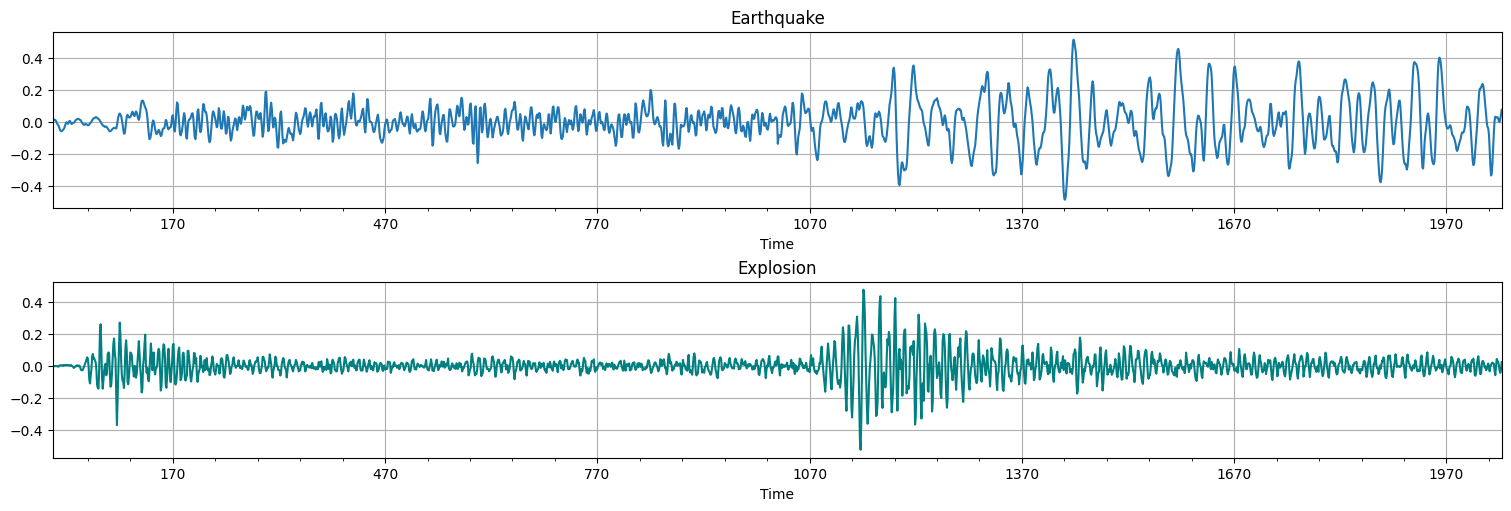

In [9]:
EQ5 = astsa.EQ5
EXP6 = astsa.EXP6

fig, axs = plt.subplots(2, 1, constrained_layout = True)
EQ5.plot(ax=axs[0], xlabel="Time", title="Earthquake", legend=False)
EXP6.plot(ax=axs[1], xlabel="Time", title="Explosion", color="teal", legend=False);

### Observaciones:

* Claramente las gráficas son distintas "a ojo".

* ¿Podemos entrenar un algoritmo que distinga ambos fenómenos?

* ¿Podemos hacer que lo distinga en tiempo real?

* ¿Podemos clasificar automáticamente las series? ¿Cuáles son las características esenciales?

## Ejemplo 8: Covid-19



In [13]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/GUIAD-COVID/datos-y-visualizaciones-GUIAD/master/datos/estadisticasUY.csv", index_col=[0], parse_dates=[0], date_format="%d/%m/%Y")
data["cantCasosNuevosAjustado"].plot(xlabel="Fecha", title="Casos nuevos reportados diarios de COVID-19 en Uruguay");

KeyboardInterrupt: 

### Observaciones:

* Serie con fases bien diferenciadas:
   * Momentos de "relativo control".
   * Momentos de crecimiento exponencial (olas) y luego descenso

* Presenta picos producto de fenómenos intra-semana.

* Una pregunta posible es: ¿Cómo detectamos el crecimiento exponencial?

* ¿Podemos explicar el comportamiento de la serie a partir de otros datos poblacionales? (Ej: movilidad)

## Objetivos del curso

* Proveer modelos matemáticos para el análisis de series temporales.

* Fuerte base matemática para modelar los fenómenos más comunes.

* Proveer herramientas para responder las preguntas anteriores.

* Aprender los modelos clásicos de series. Ajuste, predicción de valores futuros, filtrado y suavizado, etc. etc.

* Explorar técnicas más avanzadas (en particular en el trabajo obligatorio).